I will be exploring publicly available Lending Club data from Kaggle. Lending Club is a platform bringing borrowers and investors together, transforming the way people access credit. As an investor, you would want to invest in people who showed a profile of having a high probability of paying back. I will try to create a model to predict this.

The features represent as follow:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan
3. int.rate: The interest rate of the loan
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loan**

In [108]:
# load dataset
loan = pd.read_csv("loandata.csv")

** Check out the info(), head(), and describe() methods on loan**

In [109]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9567 non-null float64
installment          9568 non-null float64
log.annual.inc       9563 non-null float64
dti                  9572 non-null float64
fico                 9570 non-null float64
days.with.cr.line    9569 non-null float64
revol.bal            9566 non-null float64
revol.util           9554 non-null float64
inq.last.6mths       9576 non-null float64
delinq.2yrs          9437 non-null float64
pub.rec              9571 non-null float64
not.fully.paid       9578 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 1.0+ MB


In [110]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9567.000000,9568.000000,9563.000000,9572.000000,9570.000000,9569.000000,9.566000e+03,9554.00000,9576.000000,9437.000000,9571.000000,9578.000000
mean,0.804970,0.122635,319.023501,10.932103,12.607233,710.845873,4560.281978,1.692094e+04,46.79152,1.576859,0.166154,0.062167,0.160054
std,0.396245,0.026847,207.043263,0.614959,6.885266,37.976124,2496.825275,3.377021e+04,28.99753,2.199488,0.549911,0.262217,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.767500,10.558414,7.207500,682.000000,2820.000000,3.192250e+03,22.60000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.670000,707.000000,4139.958333,8.598000e+03,46.30000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.282500,11.289832,17.950000,737.000000,5730.000000,1.826175e+04,70.90000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.00000,33.000000,13.000000,5.000000,1.000000


In [111]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,NaN,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,NaN,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,NaN,1.0,NaN,NaN,0
3,1,debt_consolidation,0.1008,162.34,NaN,8.10,712.0,2699.958333,NaN,73.2,1.0,NaN,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,NaN,4066.000000,4740.0,39.5,0.0,1.0,0.0,0


Check the missing values of features

In [112]:
loan.isnull().sum()

credit.policy          0
purpose                0
int.rate              11
installment           10
log.annual.inc        15
dti                    6
fico                   8
days.with.cr.line      9
revol.bal             12
revol.util            24
inq.last.6mths         2
delinq.2yrs          141
pub.rec                7
not.fully.paid         0
dtype: int64

Check the size of the data

In [113]:
loan.shape

(9578, 14)

In [114]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
Appareantly, the dataset is imbalance

In [115]:
loan.groupby('not.fully.paid').size()

not.fully.paid
0    8045
1    1533
dtype: int64

Data correlation matrix The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. Let's calculate the correlation matrix for our dataset.

In [116]:
corr = loan.corr()
corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.293710,0.058222,0.034743,-0.091217,0.348287,0.099649,-0.187800,-0.104299,-0.535241,-0.079615,-0.054164,-0.158119
int.rate,-0.293710,1.000000,0.276177,0.055678,0.220596,-0.715120,-0.124672,0.092854,0.465914,0.202264,0.157732,0.097980,0.159363
installment,0.058222,0.276177,1.000000,0.448057,0.050474,0.085199,0.183013,0.234313,0.082077,-0.010026,-0.005139,-0.032740,0.050034
log.annual.inc,0.034743,0.055678,0.448057,1.000000,-0.053848,0.114605,0.337941,0.372028,0.053639,0.029235,0.029439,0.016746,-0.033453
dti,-0.091217,0.220596,0.050474,-0.053848,1.000000,-0.241205,0.060211,0.188702,0.336958,0.028785,-0.022514,0.006180,0.037333
fico,0.348287,-0.715120,0.085199,0.114605,-0.241205,1.000000,0.264385,-0.015506,-0.542802,-0.185091,-0.218097,-0.147622,-0.149698
days.with.cr.line,0.099649,-0.124672,0.183013,0.337941,0.060211,0.264385,1.000000,0.229608,-0.023413,-0.041967,0.081777,0.071914,-0.029389
revol.bal,-0.187800,0.092854,0.234313,0.372028,0.188702,-0.015506,0.229608,1.000000,0.204114,0.022772,-0.033096,-0.031014,0.054009
revol.util,-0.104299,0.465914,0.082077,0.053639,0.336958,-0.542802,-0.023413,0.204114,1.000000,-0.013929,-0.042029,0.065607,0.082621
inq.last.6mths,-0.535241,0.202264,-0.010026,0.029235,0.028785,-0.185091,-0.041967,0.022772,-0.013929,1.000000,0.022816,0.072792,0.148851


not.fully.paid
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

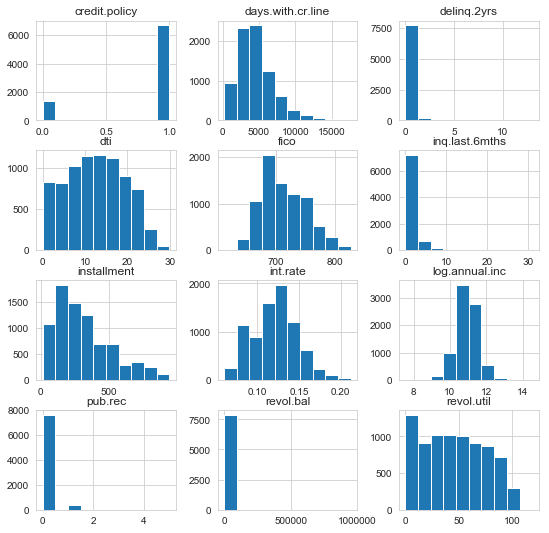

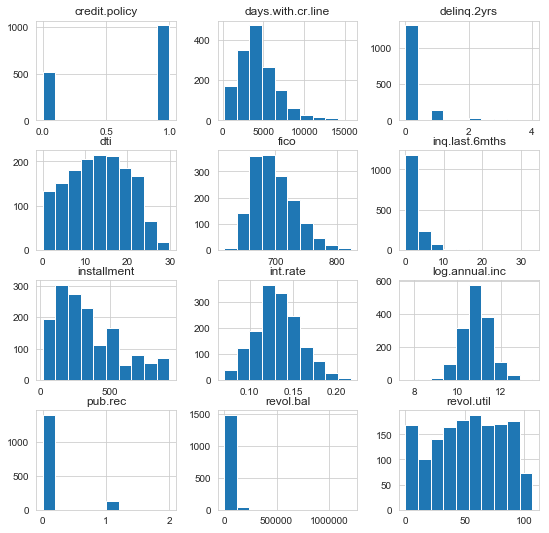

In [117]:
loan.groupby('not.fully.paid').hist(figsize=(9, 9))

In [118]:
loan.isnull().sum()

credit.policy          0
purpose                0
int.rate              11
installment           10
log.annual.inc        15
dti                    6
fico                   8
days.with.cr.line      9
revol.bal             12
revol.util            24
inq.last.6mths         2
delinq.2yrs          141
pub.rec                7
not.fully.paid         0
dtype: int64

In [119]:
# select the columns where missing values and locate the zeros as a mask
mask = loan[['int.rate', 'installment', 'log.annual.inc', 'dti','fico', 'days.with.cr.line',
             'revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']] == 0

In [120]:
# replace the zeros with np.nan 
loan[mask] = np.nan
loan.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,NaN,NaN,NaN,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,NaN,NaN,NaN,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,NaN,1.0,NaN,NaN,0
3,1,debt_consolidation,0.1008,162.34,NaN,8.10,712.0,2699.958333,NaN,73.2,1.0,NaN,NaN,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,NaN,4066.000000,4740.0,39.5,NaN,1.0,NaN,0


In [121]:
loan.mean()

credit.policy            0.804970
int.rate                 0.122635
installment            319.023501
log.annual.inc          10.932103
dti                     12.725554
fico                   710.845873
days.with.cr.line     4560.281978
revol.bal            17504.676436
revol.util              48.282339
inq.last.6mths           2.542516
delinq.2yrs              1.400000
pub.rec                  1.064401
not.fully.paid           0.160054
dtype: float64

In [122]:
loan.median()

credit.policy           1.000000
int.rate                0.122100
installment           268.950000
log.annual.inc         10.928238
dti                    12.760000
fico                  707.000000
days.with.cr.line    4139.958333
revol.bal            8989.000000
revol.util             47.800000
inq.last.6mths          2.000000
delinq.2yrs             1.000000
pub.rec                 1.000000
not.fully.paid          0.000000
dtype: float64

# Exploratory Data Analysis

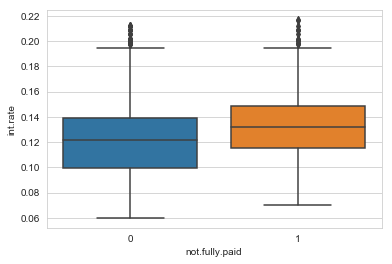

In [123]:
sns.boxplot(x=loan["not.fully.paid"], y=loan["int.rate"])

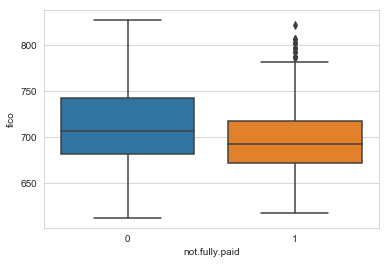

In [124]:
sns.boxplot(x=loan["not.fully.paid"], y=loan["fico"])

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

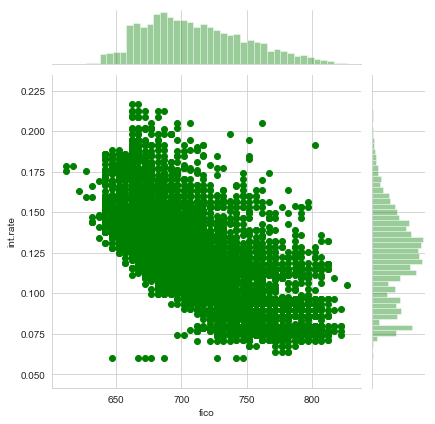

In [125]:
sns.jointplot(x='fico',y='int.rate',data=loan, color='green')

In [126]:
# Calculate the median value 
# Substitute it in the column of the dataset where values are NaN
median_int_rate = loan['int.rate'].median()
loan['int.rate'] = loan['int.rate'].replace(to_replace=np.nan, value=median_int_rate)

In [127]:
median_installment = loan['installment'].median()
loan['installment'] = loan['installment'].replace(to_replace=np.nan, value=median_installment)

In [128]:
median_LAI = loan['log.annual.inc'].median()
loan['log.annual.inc'] = loan['log.annual.inc'].replace(to_replace=np.nan, value=median_LAI)

In [129]:
median_dti = loan['dti'].median()
loan['dti'] = loan['dti'].replace(to_replace=np.nan, value=median_dti)

In [130]:
median_fico = loan['fico'].median()
loan['fico'] = loan['fico'].replace(to_replace=np.nan, value=median_fico)

In [131]:
median_days = loan['days.with.cr.line'].median()
loan['days.with.cr.line'] = loan['days.with.cr.line'].replace(to_replace=np.nan, value=median_days)

In [132]:
median_bal = loan['revol.bal'].median()
loan['revol.bal'] = loan['revol.bal'].replace(to_replace=np.nan, value=median_bal)

In [133]:
median_util = loan['revol.util'].median()
loan['revol.util'] = loan['revol.util'].replace(to_replace=np.nan, value=median_util)

In [134]:
median_6mths = loan['inq.last.6mths'].median()
loan['inq.last.6mths'] = loan['inq.last.6mths'].replace(to_replace=np.nan, value=median_6mths)

In [135]:
median_delinq = loan['delinq.2yrs'].median()
loan['delinq.2yrs'] = loan['delinq.2yrs'].replace(to_replace=np.nan, value=median_delinq)

In [136]:
median_pub = loan['pub.rec'].median()
loan['pub.rec'] = loan['pub.rec'].replace(to_replace=np.nan, value=median_pub)

In [137]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Feature Engineering

In [138]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [139]:
#y is the valuable we are looking for 
feature_names = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
                 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
X = loan[feature_names].values
y = loan['not.fully.paid'].values

# Split data into train and test sets

In [140]:
# split dataset into test/train in 80% /20%
# random_state shuffle the same way everytime
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35, test_size=0.2)

In [141]:
X_train.shape, X_test.shape

((7662, 12), (1916, 12))

# Standardize the data

In [142]:
# scale/standardize features
#why we don't call fit on test data? 
# fit_transform - fit get the mean of the std for this dataset. Transform - take the mean and calculate the value  
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 

In [143]:
X_train[:5]

array([[0.00000000e+00, 1.28700000e-01, 6.72670000e+02, 1.16082356e+01,
        2.34000000e+01, 7.17000000e+02, 5.43000000e+03, 1.22620000e+05,
        4.78000000e+01, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.38000000e-02, 1.57600000e+01, 1.04042628e+01,
        2.15000000e+00, 7.17000000e+02, 6.35900000e+03, 3.46100000e+03,
        1.86000000e+01, 1.00000000e+01, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.74000000e-02, 3.12190000e+02, 1.07789563e+01,
        2.38000000e+00, 7.97000000e+02, 5.40000000e+03, 4.65000000e+03,
        1.41000000e+01, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.28400000e-01, 4.30310000e+02, 1.10020998e+01,
        1.16200000e+01, 6.97000000e+02, 2.16000000e+03, 1.39570000e+04,
        4.61000000e+01, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.09900000e-01, 4.25560000e+02, 1.15711944e+01,
        1.63600000e+01, 7.22000000e+02, 7.50004167e+03, 2.23

In [144]:
X_train_std[:5]

array([[-2.0420677 ,  0.22778317,  1.70353581,  1.0941218 ,  1.57090349,
         0.16553278,  0.34509987,  3.11988255, -0.0191254 , -0.1832118 ,
        -0.13761748, -0.04584713],
       [-2.0420677 , -1.45490233, -1.46687556, -0.87253306, -1.56777671,
         0.16553278,  0.71763172, -0.40751569, -1.07414142,  4.11623323,
        -0.13761748, -0.04584713],
       [ 0.48969973, -1.6947506 , -0.03623051, -0.26048211, -1.53380511,
         2.27630813,  0.33306977, -0.37231837, -1.2367295 , -0.1832118 ,
        -0.13761748, -0.04584713],
       [ 0.48969973,  0.21654028,  0.53384605,  0.10401645, -0.16903311,
        -0.36216106, -0.96618019, -0.09680838, -0.08054757, -0.1832118 ,
        -0.13761748, -0.04584713],
       [-2.0420677 , -0.47677111,  0.51092137,  1.03361595,  0.5310772 ,
         0.29745624,  1.17519294,  0.15176338,  0.6240008 ,  0.89164946,
        -0.13761748, -0.04584713]])

# SVM Classifier

In [145]:
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)
pred_svm = svm.predict(X_test_std)
svm.score(X_test_std, y_test)

0.8350730688935282

In [146]:
#model performed
print(classification_report(y_test,pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1600
           1       0.00      0.00      0.00       316

   micro avg       0.84      0.84      0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.70      0.84      0.76      1916

[[1600    0]
 [ 316    0]]


# Logistic Classifier

In [147]:
log_reg = LogisticRegression()
logreg = log_reg.fit(X_train_std, y_train)
pred_logreg = log_reg.predict(X_test_std)
logreg.score(X_test_std, y_test)

0.8345511482254697

In [148]:
#log_reg.score(X_test, y_test)
#model performed
print(classification_report(y_test,pred_logreg))
print(confusion_matrix(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1600
           1       0.43      0.01      0.02       316

   micro avg       0.83      0.83      0.83      1916
   macro avg       0.63      0.50      0.46      1916
weighted avg       0.77      0.83      0.76      1916

[[1596    4]
 [ 313    3]]


# Decision Tree

In [149]:
tree = DecisionTreeClassifier()
Dtree= tree.fit(X_train_std, y_train)
pred_Dtree = Dtree.predict(X_test_std)
tree.score(X_test_std, y_test)

0.7432150313152401

In [150]:
#model performed
print(classification_report(y_test,pred_Dtree))
print(confusion_matrix(y_test, pred_Dtree))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1600
           1       0.22      0.22      0.22       316

   micro avg       0.74      0.74      0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.74      0.74      0.74      1916

[[1354  246]
 [ 246   70]]


# KNeighbors Classifier

In [151]:
knn = KNeighborsClassifier(n_neighbors=7)
KNC = knn.fit(X_train_std, y_train)
pred_KNC = KNC.predict(X_test_std)
knn.score(X_test_std, y_test)

0.8220250521920668

In [152]:
#model performed
print(classification_report(y_test,pred_KNC))
print(confusion_matrix(y_test, pred_KNC))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1600
           1       0.25      0.04      0.07       316

   micro avg       0.82      0.82      0.82      1916
   macro avg       0.55      0.51      0.49      1916
weighted avg       0.74      0.82      0.76      1916

[[1562   38]
 [ 303   13]]


# Random Forest Classifier

In [153]:
rfc = RandomForestClassifier(n_estimators=200)
rfc = rfc.fit(X_train_std, y_train)
pred_rfc = rfc.predict(X_test_std)
rfc.score(X_test_std, y_test)

0.8329853862212944

In [154]:
#model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1600
           1       0.39      0.02      0.04       316

   micro avg       0.83      0.83      0.83      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.76      0.83      0.77      1916

[[1589   11]
 [ 309    7]]


# Apply one hot encoding

In [155]:
list(loan["purpose"].unique())

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

In [156]:
onehot_purpose = pd.get_dummies(loan, columns=["purpose"])
onehot_purpose.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,2.0,1.0,1.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,2.0,1.0,1.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,47.8,1.0,1.0,1.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,10.928238,8.10,712.0,2699.958333,8989.0,73.2,1.0,1.0,1.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,707.0,4066.000000,4740.0,39.5,2.0,1.0,1.0,0,0,1,0,0,0,0,0


# Feature Engineering

In [157]:
onehot_purpose.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [158]:
#y is the valuable we are looking for 
feature_names = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']
X = onehot_purpose[feature_names].values
y = onehot_purpose['not.fully.paid'].values

# Split data into train and test sets

In [159]:
# split dataset into test/train in 80% /20%
# random_state shuffle the same way everytime
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35, test_size=0.2)

In [160]:
X_train.shape, X_test.shape

((7662, 19), (1916, 19))

# Standardize the data

In [161]:
# scale/standardize features
#why we don't call fit on test data? 
# fit_transform - fit get the mean of the std for this dataset. Transform - take the mean and calculate the value  
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 

In [162]:
X_train[:1]

array([[0.00000000e+00, 1.28700000e-01, 6.72670000e+02, 1.16082356e+01,
        2.34000000e+01, 7.17000000e+02, 5.43000000e+03, 1.22620000e+05,
        4.78000000e+01, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [163]:
X_train_std[:1]

array([[-2.0420677 ,  0.22778317,  1.70353581,  1.0941218 ,  1.57090349,
         0.16553278,  0.34509987,  3.11988255, -0.0191254 , -0.1832118 ,
        -0.13761748, -0.04584713, -0.57102047,  2.61426009, -0.84481393,
        -0.19330803, -0.26252126, -0.2213916 , -0.25880942]])

# SVM Classifier

In [164]:
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)
pred_svm = svm.predict(X_test_std)
svm.score(X_test_std, y_test)

0.8350730688935282

In [165]:
#model performed
print(classification_report(y_test,pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1600
           1       0.00      0.00      0.00       316

   micro avg       0.84      0.84      0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.70      0.84      0.76      1916

[[1600    0]
 [ 316    0]]


# Logistic Classifier

In [166]:
log_reg = LogisticRegression()
logreg = log_reg.fit(X_train_std, y_train)
pred_logreg = log_reg.predict(X_test_std)
logreg.score(X_test_std, y_test)

0.8340292275574113

In [167]:
#model performed
print(classification_report(y_test,pred_logreg))
print(confusion_matrix(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1600
           1       0.45      0.03      0.05       316

   micro avg       0.83      0.83      0.83      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.77      0.83      0.77      1916

[[1589   11]
 [ 307    9]]


# Decision Tree

In [168]:
tree = DecisionTreeClassifier()
Dtree= tree.fit(X_train_std, y_train)
pred_Dtree = Dtree.predict(X_test_std)
Dtree.score(X_test_std, y_test)

0.7406054279749478

In [169]:
#model performed
print(classification_report(y_test,pred_Dtree))
print(confusion_matrix(y_test, pred_Dtree))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1600
           1       0.22      0.23      0.22       316

   micro avg       0.74      0.74      0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.74      0.74      0.74      1916

[[1347  253]
 [ 244   72]]


# KNeighborsClassifier

In [170]:
knn = KNeighborsClassifier(n_neighbors=7)
KNC = knn.fit(X_train_std, y_train)
pred_KNC = KNC.predict(X_test_std)
KNC.score(X_test_std, y_test)

0.8194154488517745

In [171]:
#model performed
print(classification_report(y_test,pred_KNC))
print(confusion_matrix(y_test, pred_KNC))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1600
           1       0.26      0.05      0.08       316

   micro avg       0.82      0.82      0.82      1916
   macro avg       0.55      0.51      0.49      1916
weighted avg       0.74      0.82      0.77      1916

[[1554   46]
 [ 300   16]]


# Random Forest Classifier

In [172]:
rfc = RandomForestClassifier(n_estimators=200)
rfc = rfc.fit(X_train_std, y_train)
pred_rfc = rfc.predict(X_test_std)
rfc.score(X_test_std, y_test)

0.831419624217119

In [173]:
#model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1600
           1       0.29      0.02      0.03       316

   micro avg       0.83      0.83      0.83      1916
   macro avg       0.57      0.50      0.47      1916
weighted avg       0.75      0.83      0.76      1916

[[1588   12]
 [ 311    5]]


# Cross Validation

In [174]:
# 10-fold cross validation with a list of algorithms

classifiers = [svm, log_reg, Dtree, KNC, rfc]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [175]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["SVM", "LR", "DTree", "KNC", "Forest"])
models_df

,1,2,3,4,5,6,7,8,9,10
SVM,0.840939,0.840939,0.840939,0.840939,0.840939,0.840731,0.840731,0.841830,0.841830,0.841830
LR,0.838331,0.843546,0.839635,0.844850,0.842243,0.844648,0.839426,0.841830,0.837908,0.841830
DTree,0.761408,0.736636,0.758801,0.700130,0.706649,0.720627,0.755875,0.715033,0.747712,0.745098
KNC,0.835724,0.825293,0.827901,0.817471,0.823990,0.835509,0.832898,0.819608,0.835294,0.828758
Forest,0.835724,0.842243,0.840939,0.843546,0.840939,0.842037,0.836815,0.841830,0.840523,0.836601


In [176]:
# add a "Mean" column to the end of the DataFrame

models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
SVM,0.840939,0.840939,0.840939,0.840939,0.840939,0.840731,0.840731,0.841830,0.841830,0.841830,0.841165
LR,0.838331,0.843546,0.839635,0.844850,0.842243,0.844648,0.839426,0.841830,0.837908,0.841830,0.841425
DTree,0.761408,0.736636,0.758801,0.700130,0.706649,0.720627,0.755875,0.715033,0.747712,0.745098,0.734797
KNC,0.835724,0.825293,0.827901,0.817471,0.823990,0.835509,0.832898,0.819608,0.835294,0.828758,0.828245
Forest,0.835724,0.842243,0.840939,0.843546,0.840939,0.842037,0.836815,0.841830,0.840523,0.836601,0.840120


# Boxplot and Model Selection

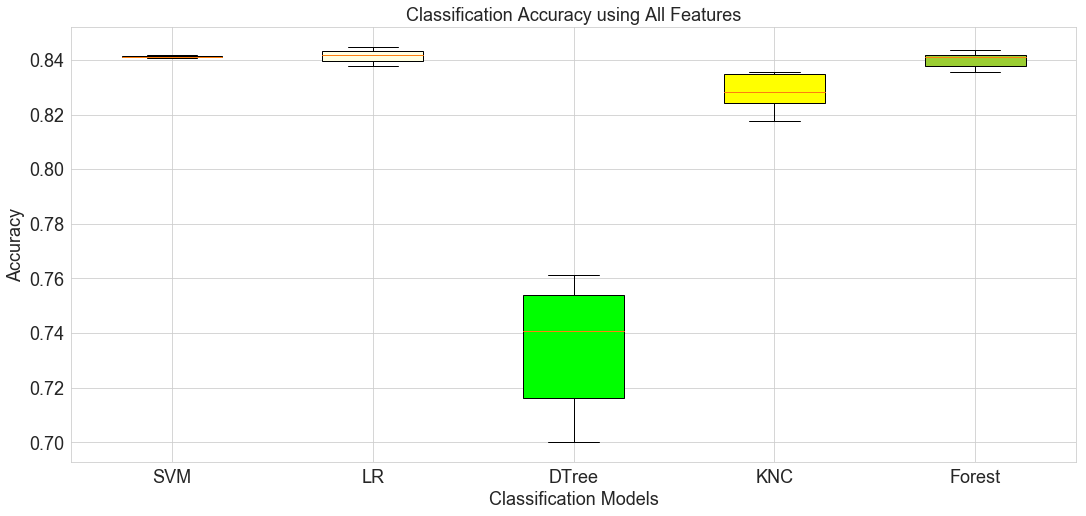

In [179]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
#axes.set_ylim((0.7, 0.85))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['SVM', 'LR', 'DTree', 'KNC', 'Forest'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

# Hyperparameter Tuning (Grid Search)

In [ ]:
# hyperparameter tuning can be done manually or using Grid Search
# GridSearch returns the best model from among the various given hyperparameters

# Grid Search
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gs = GridSearchCV(estimator=svm, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}], scoring='accuracy', cv=3, n_jobs=-1)

#gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], 'n_neighbors': [3, 5, 7]}], scoring='accuracy', cv=3)

# GridSearch, by default, will return the best model, refit using ALL of the training data.
# Cross Validation, evaluates the returned GridSearch model
cross_val_score(gs, X_train_std, y_train)

In [ ]:
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))